# Init parameters

In [5]:
%cd .
import numpy as np
import matplotlib.pyplot as plt
import gvar as gv
from lsqfit import nonlinear_fit as nlinefit
N_conf = 20000
N_dump = 10000
N_skip = 100
M = int((N_conf-N_dump)/N_skip)
T = 50
N_t = 500
a = T/N_t
delta = 1

/home/zhangxin/Downloads


# Define some functions

In [15]:
def jaknf(u):
    return (np.sum(u, axis=0)-u)/(u.shape[0]-1)


def modelFunc(t, p: dict):
    return p['C0'] * np.exp(-p['E0'] * t * a)


def nonlinearFit(x, y, yerr, modelfunc: callable):
    fit = nlinefit(data=(x, gv.gvar(y, yerr)), prior=gv.gvar(
        dict(C0='1(100)', E0='1(100)')), fcn=modelfunc, debug=True)
    print(fit.format(True))
    params = [i.val for i in fit.p.values()]
    errors = [i.sdev for i in fit.p.values()]
    chi2 = fit.chi2 / fit.dof
    logGBF = fit.logGBF
    return params, errors, chi2, logGBF


def weight(u, t):
    u_b_t = u[(t-1+N_t) % N_t]
    u_f_t = u[(t+1) % N_t]
    u_t = u[t]
    S = (u_f_t-u_t)**2/(2.0*a)+a*(u_f_t**2+u_t**2)/4.0 + \
        (u_t-u_b_t)**2/(2.0*a)+a*(u_t**2+u_b_t**2)/4.0
    return np.exp(-1.0*S)

# Generating configurations

In [7]:
# Un = np.zeros((N_conf, N_t))
# old_u = np.zeros(N_t)
# new_u = np.zeros(N_t)
# for n in range(N_conf):
#     t_iter = np.array(range(N_t))
#     np.random.shuffle(t_iter)
#     for t in t_iter:
#         new_u[t] = old_u[t]+delta*np.random.uniform(-1, 1)
#         # ! new_u[t],new_u
#         if np.random.uniform(0, 1) < weight(new_u, t)/weight(old_u, t):
#             old_u[t] = new_u[t]
#         else:
#             new_u[t] = old_u[t]
#     Un[n, :] = new_u
#     print(n)
#     print(np.mean(new_u**2))
# Um = Un[N_dump:N_conf:N_skip, :]
# np.save("Um.npy", Um)

In [8]:
Um = np.load("Um.npy")

# Give Theoretical value

In [9]:
theo_u_2 = np.zeros(N_t)
R = 1+a**2/4.0-a*(1+a**2/4.0)**0.5
C = 0.5*(1+a**2/4.0)**0.5
for t in range(N_t):
    try:
        theo_u_2[t] = C*(1+R**t)/(1-R**t)
    except ZeroDivisionError:
        theo_u_2[t] = C

# Measuring the ground energy

*********HARM_OSCIL_1D_GROUND_ENERGY*********


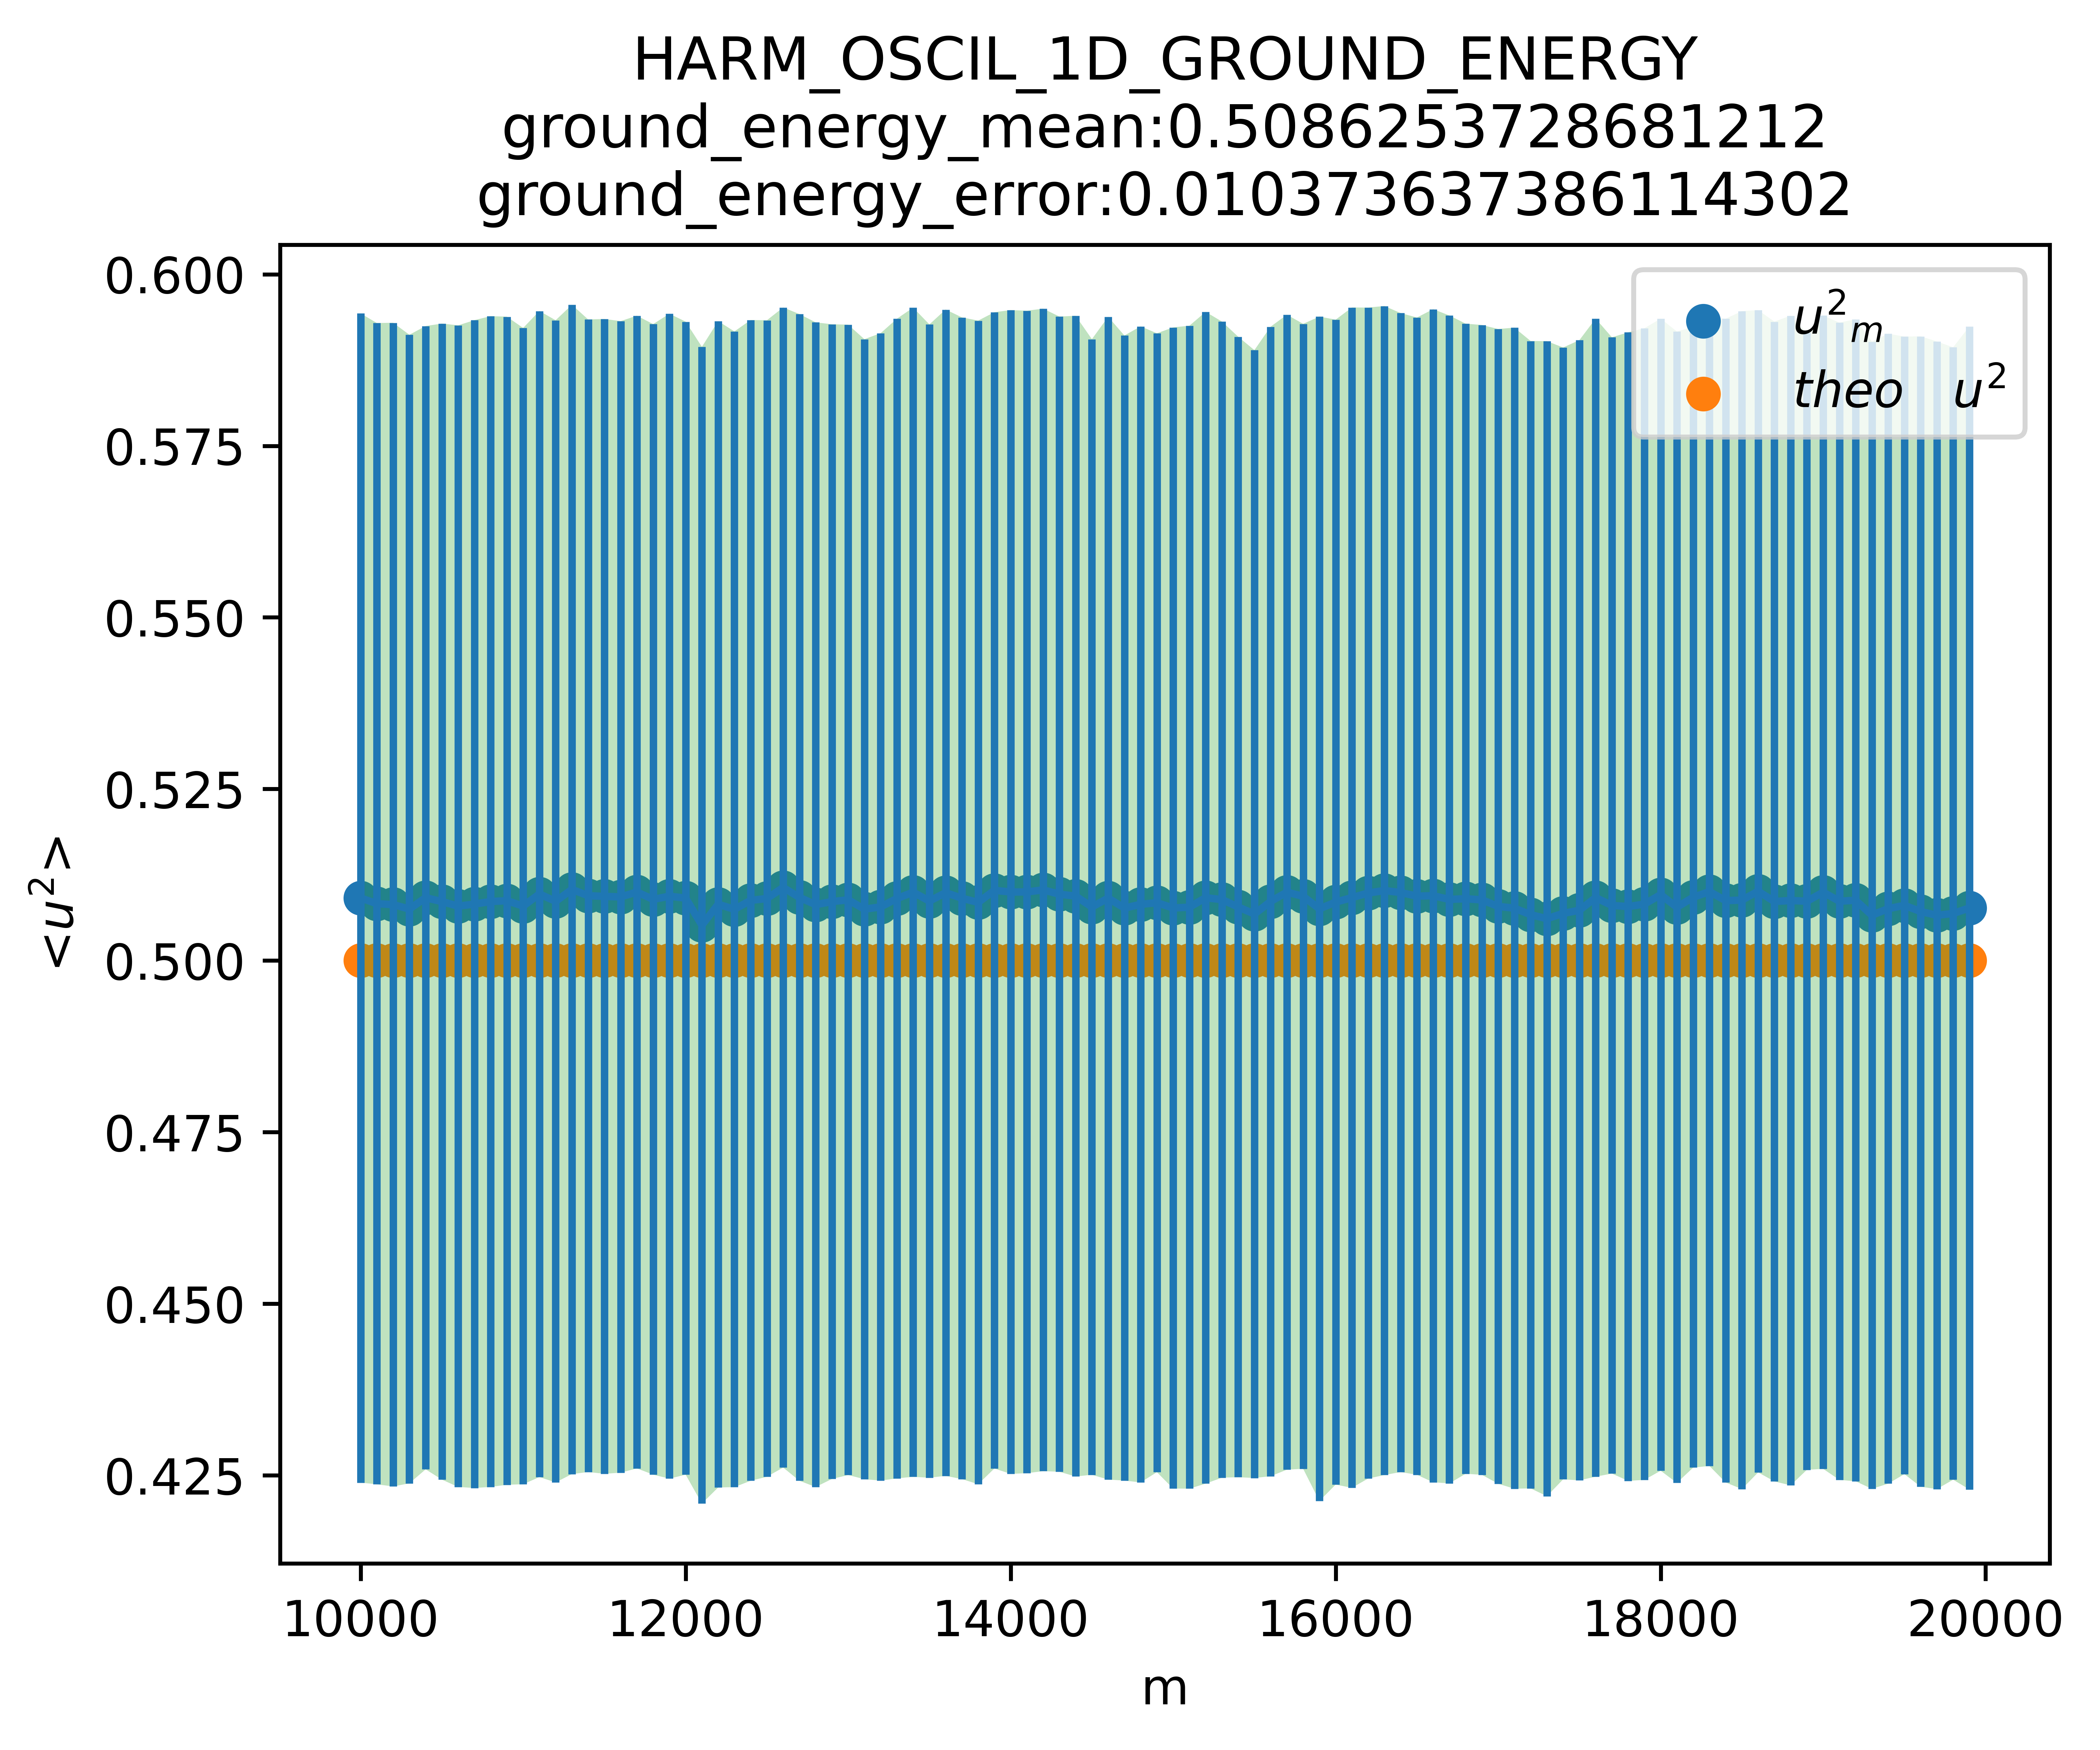

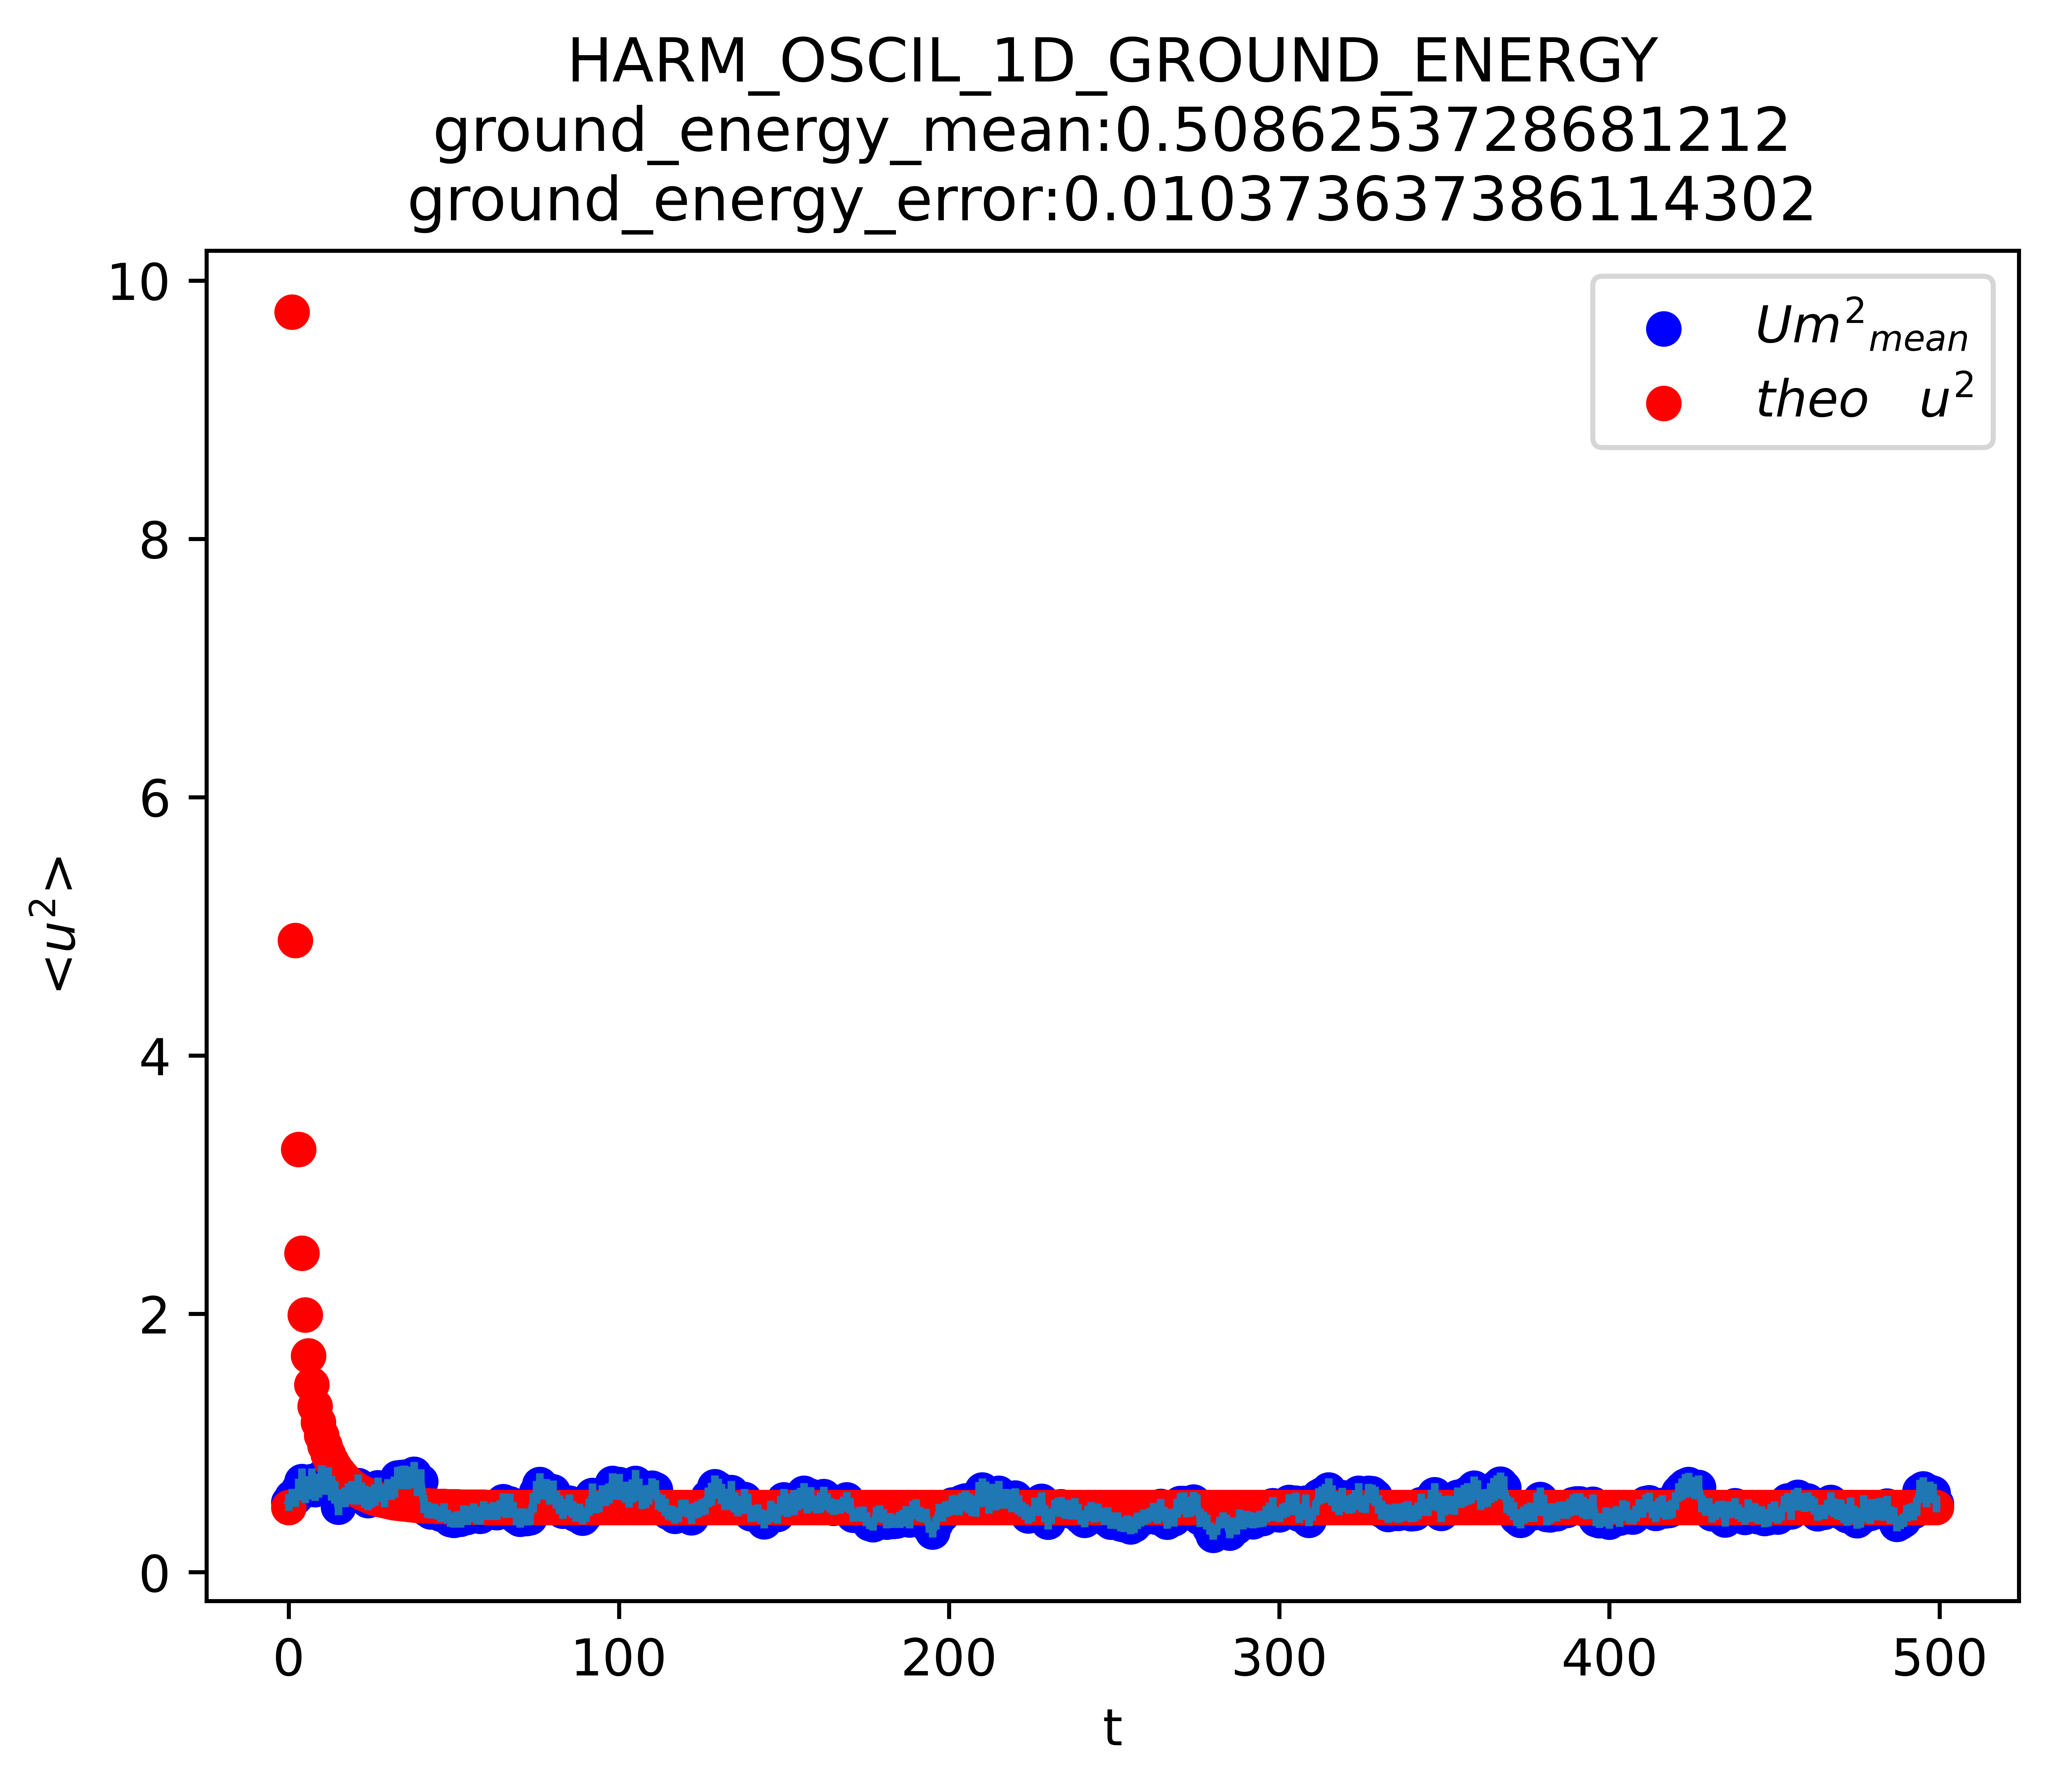

In [19]:
print("*********HARM_OSCIL_1D_GROUND_ENERGY*********")
Um_2 = Um**2
jk_Um_2 = jaknf(Um_2)
u_2 = np.mean(np.mean(jk_Um_2, axis=1), axis=0)
u_2_err = np.sum((np.mean(jk_Um_2, axis=1)-u_2)**2)**0.5
plt.figure(dpi=1000)
m_iter = np.array(range(N_conf))[N_dump:N_conf:N_skip]
u_2_m = np.mean(jk_Um_2, axis=1)
u_2_m_err = np.std(jk_Um_2, axis=1)
plt.scatter(x=m_iter, y=u_2_m, label="${u^2}_m$")
plt.scatter(x=m_iter, y=[0.5]*M, label="$theo \quad u^2$")
plt.errorbar(
    x=m_iter, y=u_2_m, yerr=u_2_m_err)
plt.fill_between(x=m_iter, y1=u_2_m-u_2_m_err,
                 y2=u_2_m+u_2_m_err, alpha=0.3)
plt.title("HARM_OSCIL_1D_GROUND_ENERGY\n"+"ground_energy_mean:" +
          str(u_2)+"\nground_energy_error:"+str(u_2_err))
plt.xlabel("m")
plt.ylabel("<$u^2$>")
plt.legend()
plt.savefig("HARM_OSCIL_1D_GROUND_ENERGY_U2M.png")
plt.show()

plt.figure(dpi=1000)
t_iter = np.array(range(N_t))
jk_Um_2_mean = np.mean(jk_Um_2, axis=0)
jk_Um_2_err = (M-1)**0.5*np.std(jk_Um_2, axis=0)
plt.scatter(x=t_iter, y=jk_Um_2_mean,
            label="${Um^2}_{mean}$", color='blue')
plt.scatter(x=t_iter, y=theo_u_2,
            label="$theo \quad u^2$", color='red')
plt.errorbar(
    x=t_iter, y=jk_Um_2_mean, yerr=jk_Um_2_err)
plt.fill_between(x=t_iter, y1=jk_Um_2_mean-jk_Um_2_err,
                 y2=jk_Um_2_mean+jk_Um_2_err, alpha=0.3)
plt.title("HARM_OSCIL_1D_GROUND_ENERGY\n"+"ground_energy_mean:" +
          str(u_2)+"\nground_energy_error:"+str(u_2_err))
plt.xlabel("t")
plt.ylabel("<$u^2$>")
plt.legend()
plt.savefig("HARM_OSCIL_1D_GROUND_ENERGY_JKU2.png")

# Measuring the excited state energy


In [11]:
# Ct = []
# jk_Um = jaknf(Um)
# for m in range(M):
#     tmp_list = []
#     for t in range(N_t):
#         tmp_list.append(
#             np.mean([Um[m, (t+t0) % N_t]*Um[m, t0] for t0 in range(N_t)]))
#     Ct.append(tmp_list)
# Ct = np.array(Ct)
# np.save("Ct.npy", Ct)

In [12]:
Ct = np.load("Ct.npy")

*********HARM_OSCIL_1D_EXCITED_STATE_ENERGY*********


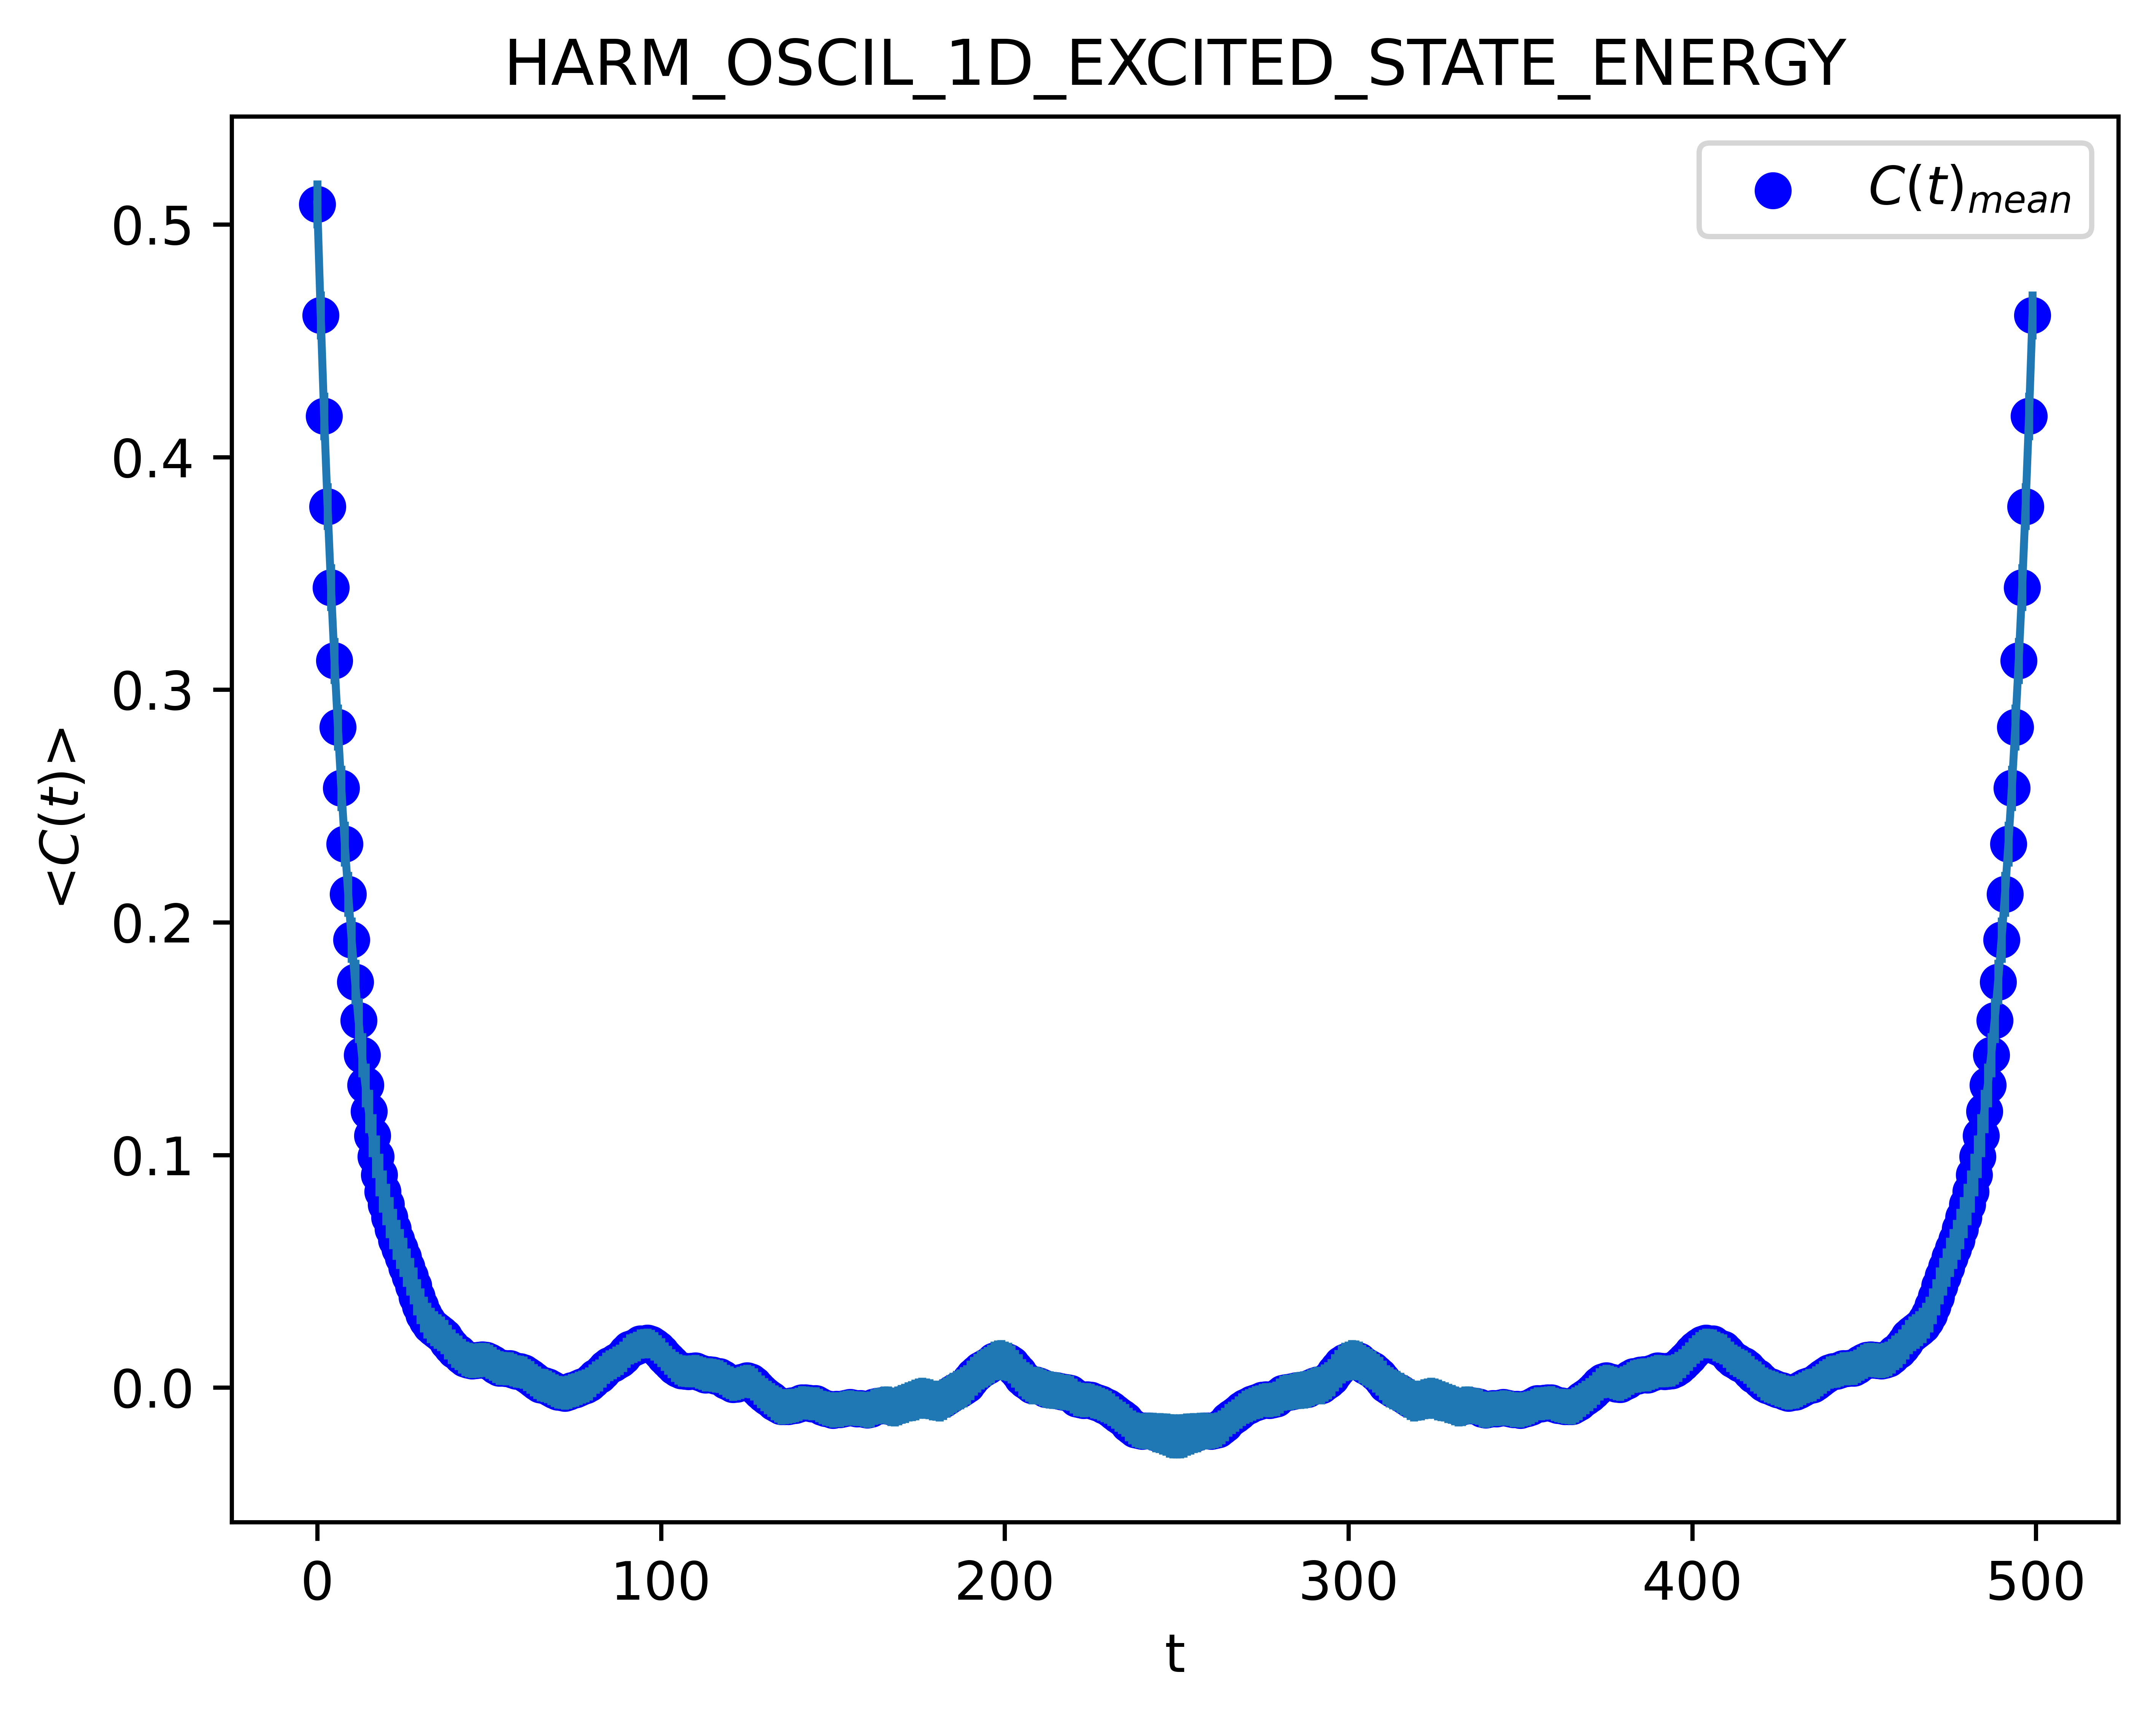

Least Square Fit:
  chi2/dof [dof] = 0.0006 [10]    Q = 1    logGBF = 20.191

Parameters:
             C0   0.486 (23)     [    1 (100) ]  
             E0   0.975 (56)     [    1 (100) ]  

Fit:
     x[k]           y[k]      f(x[k],p)
---------------------------------------
        5    0.2981 (99)    0.2984 (67)  
        6    0.2707 (98)    0.2707 (51)  
        7    0.2457 (97)    0.2455 (39)  
        8    0.2229 (97)    0.2227 (33)  
        9    0.2023 (97)    0.2020 (32)  
       10    0.1834 (97)    0.1832 (34)  
       11    0.1661 (96)    0.1662 (37)  
       12    0.1504 (96)    0.1508 (40)  
       13    0.1364 (95)    0.1368 (43)  
       14    0.1243 (94)    0.1241 (45)  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 6/0.0)
  fitter = scipy_least_squares    method = trf



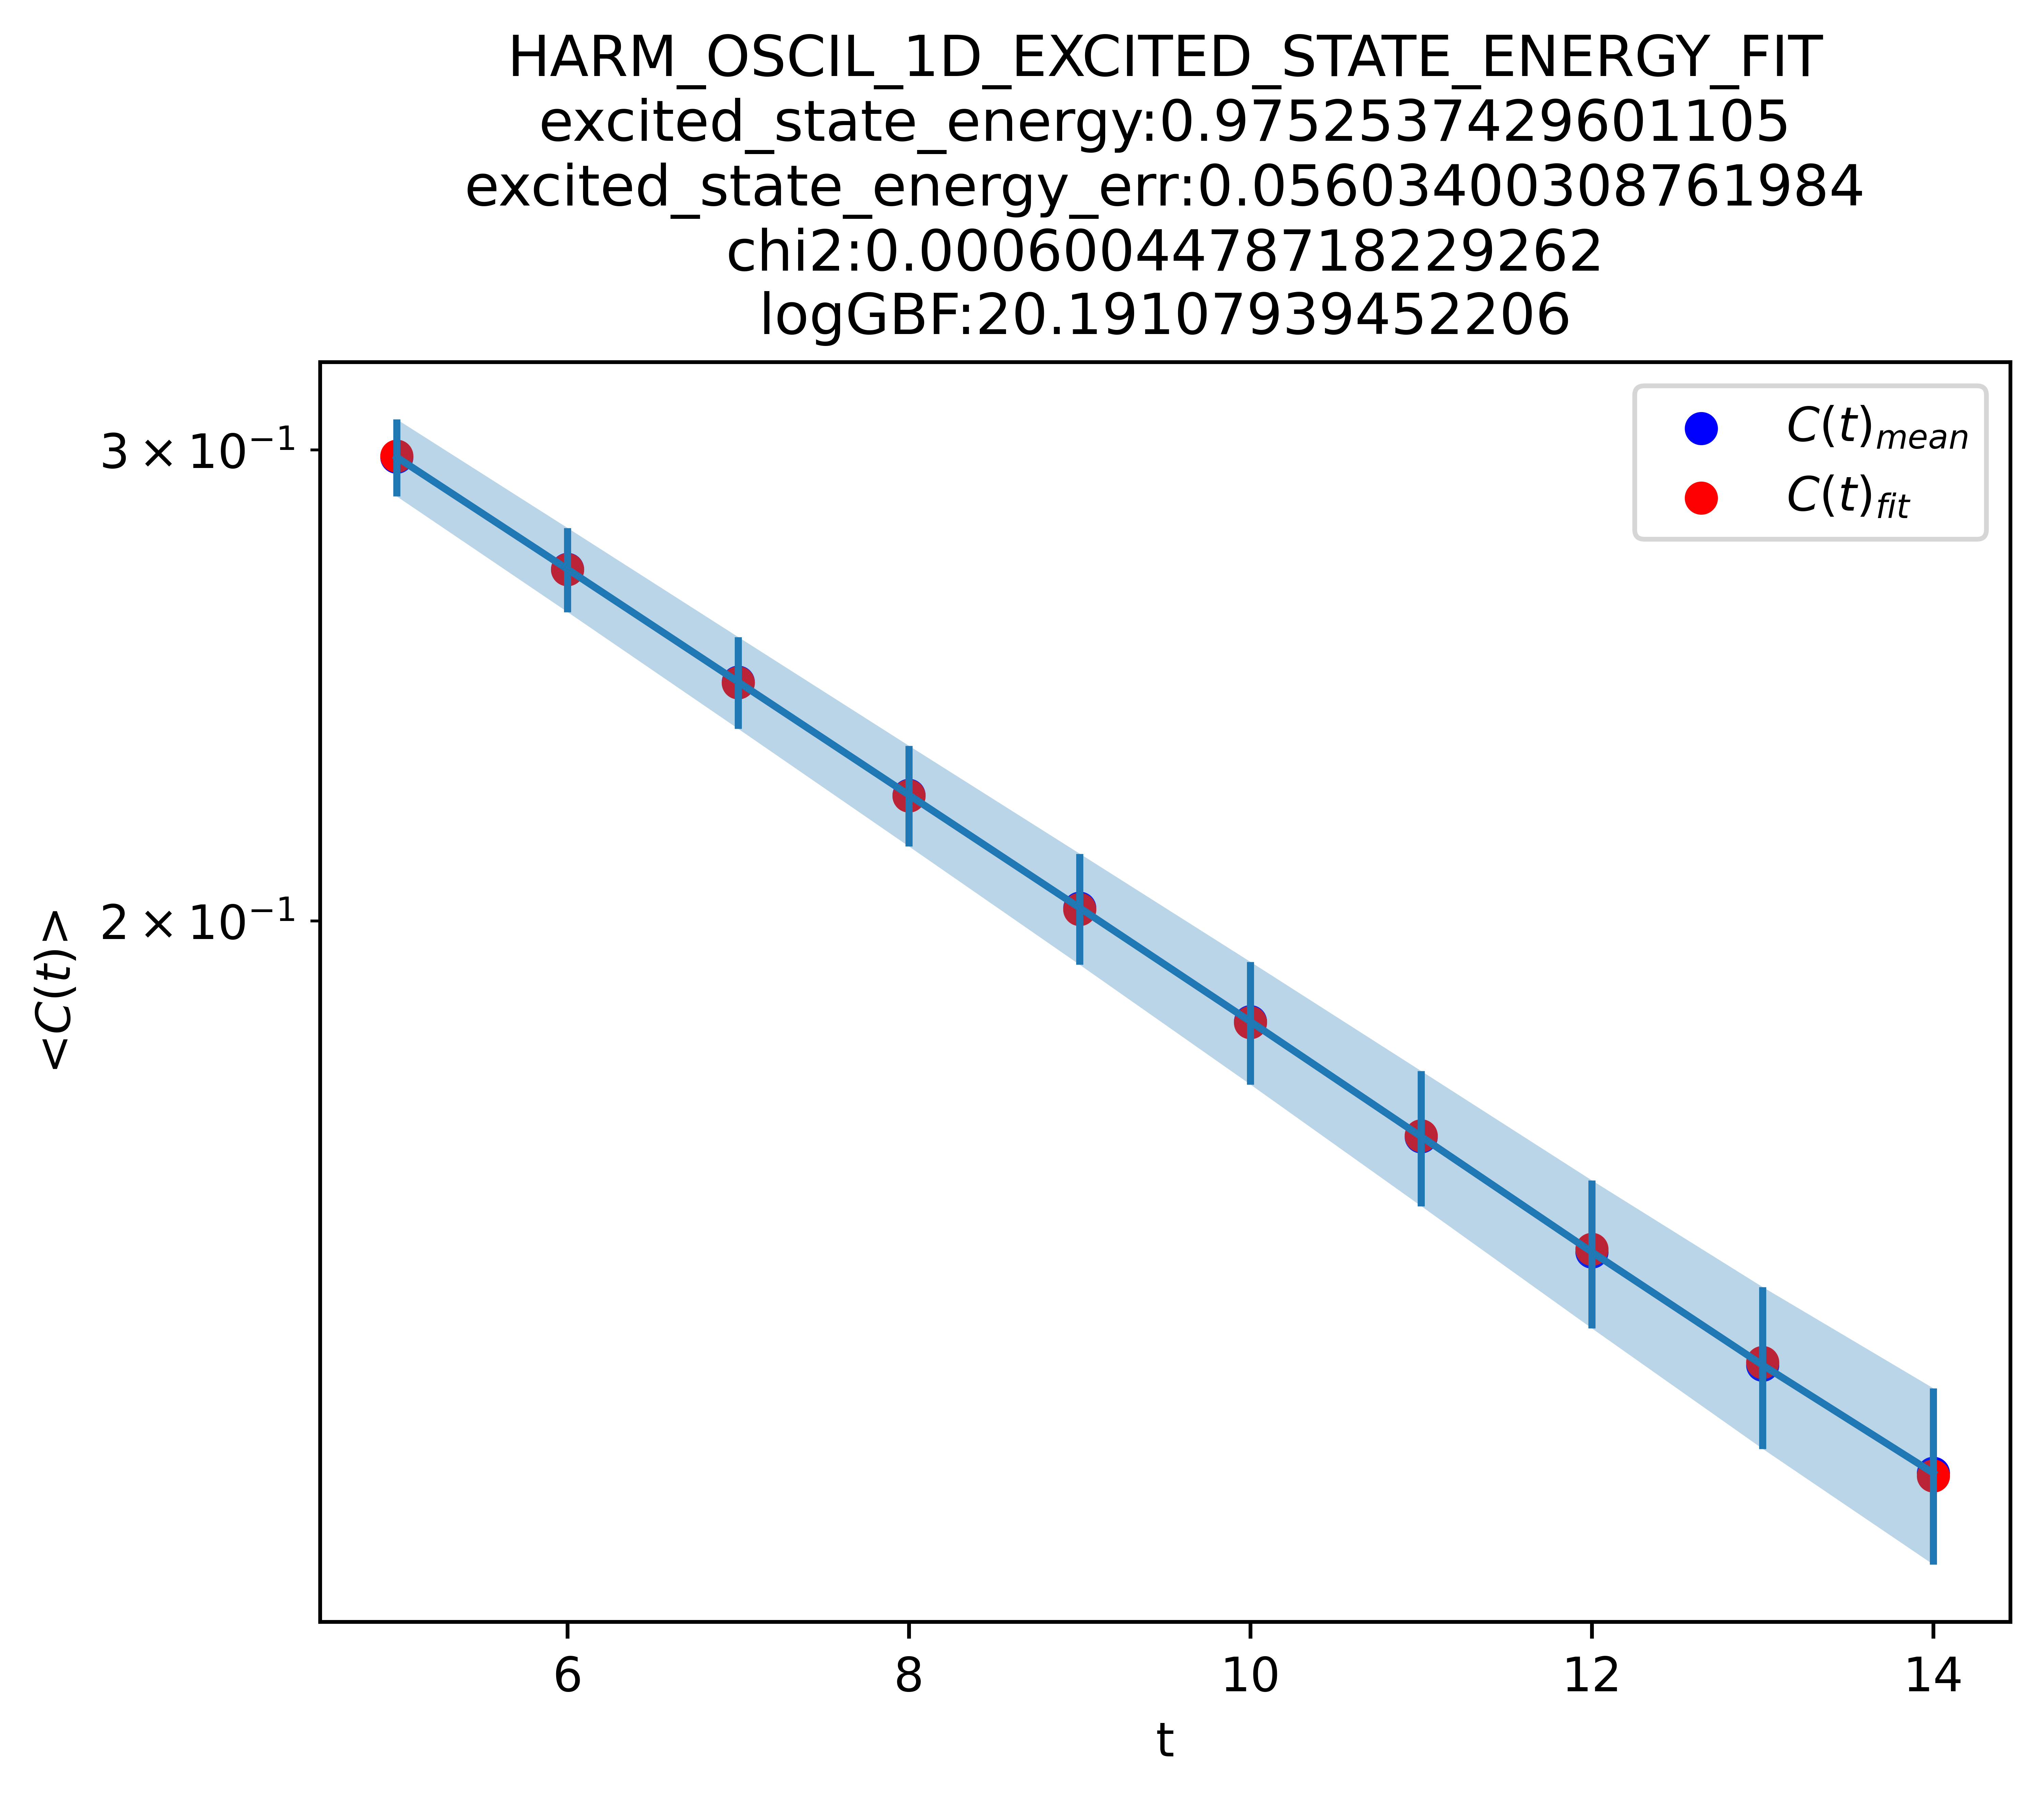

In [39]:
jk_Ct = jaknf(Ct)
jk_Ct_mean = np.mean(jk_Ct, axis=0)
jk_Ct_err = (jk_Ct.shape[0]-1)**0.5*np.std(jk_Ct, axis=0)
print("*********HARM_OSCIL_1D_EXCITED_STATE_ENERGY*********")
plt.figure(dpi=1000)
t_iter = np.array(range(jk_Ct.shape[1]))
plt.scatter(x=t_iter, y=jk_Ct_mean, label="${C(t)}_{mean}$", color='blue')
plt.errorbar(
    x=t_iter, y=jk_Ct_mean, yerr=jk_Ct_err)
plt.fill_between(x=t_iter, y1=jk_Ct_mean-jk_Ct_err,
                 y2=jk_Ct_mean+jk_Ct_err, alpha=0.3)
plt.xlabel("t")
plt.ylabel("<$C(t)$>")
plt.legend()
plt.title("HARM_OSCIL_1D_EXCITED_STATE_ENERGY")
plt.savefig("HARM_OSCIL_1D_EXCITED_STATE_ENERGY.png")
plt.show()

t_start = 5
t_end = 15
t_iter_ = t_iter[t_start:t_end]
Ct_ = (Ct[:, t_start:t_end:]+Ct[:, N_t-t_end:N_t-t_start:][:, ::-1])/2
jk_Ct_ = jaknf(Ct_)
jk_Ct_mean_ = np.mean(jk_Ct_, axis=0)
jk_Ct_err_ = (jk_Ct_.shape[0]-1)**0.5*np.std(jk_Ct_, axis=0)
params, errors, chi2, logGBF = nonlinearFit(
    x=t_iter_, y=jk_Ct_mean_, yerr=jk_Ct_err_, modelfunc=modelFunc)
plt.figure(dpi=1000)
plt.scatter(x=t_iter_, y=jk_Ct_mean_,
            label="${C(t)}_{mean}$", color='blue')
plt.scatter(x=t_iter_, y=[params[0]*np.exp(-t*a*params[1])
            for t in t_iter_], label="${C(t)}_{fit}$", color='red')
plt.errorbar(
    x=t_iter_, y=jk_Ct_mean_, yerr=jk_Ct_err_)
plt.fill_between(x=t_iter_, y1=jk_Ct_mean_-jk_Ct_err_,
                 y2=jk_Ct_mean_+jk_Ct_err_, alpha=0.3)
plt.xlabel("t")
plt.ylabel("<$C(t)$>")
plt.yscale("log")
plt.legend()
plt.title("HARM_OSCIL_1D_EXCITED_STATE_ENERGY_FIT"+"\nexcited_state_energy:" +
          str(params[1])+"\nexcited_state_energy_err:"+str(errors[1])+"\nchi2:"+str(chi2)+"\nlogGBF:"+str(logGBF))
plt.savefig("HARM_OSCIL_1D_EXCITED_STATE_ENERGY_FIT.png")
plt.show()